In [2]:
# Import pandas(for making data tables)
import pandas as pd
import numpy as np

# Graphing modules
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from matplotlib import mlab as ml
import seaborn as sns

# Makes plots in notebook
%matplotlib inline

In [3]:
# Create a Dataframe (data from data.seattle.gov)
df = pd.read_csv('../seattle_911.csv', low_memory=False)

In [4]:
# Examine head of the DataFrame
df.head()

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number
0,NaN,--T::00,,NaN,NaN,NaN,NaN
1,6900 37th Av S,Medic Response,11/09/2011 11:33:00 PM +0000,47.540683,-122.286131,"(47.540683, -122.286131)",F110104166
2,N 50th St / Stone Way N,Aid Response,11/09/2011 11:32:00 PM +0000,47.665034,-122.340207,"(47.665034, -122.340207)",F110104164
3,E John St / E Olive Way,Aid Response,11/09/2011 11:32:00 PM +0000,47.619575,-122.324257,"(47.619575, -122.324257)",F110104165
4,611 12th Av S,Aid Response,11/09/2011 11:29:00 PM +0000,47.597406,-122.317228,"(47.597406, -122.317228)",F110104162


In [5]:
# Rows, columns for DataFrame

In [6]:
# There are no missing values, but Latitude was not cast as a float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555768 entries, 0 to 555767
Data columns (total 7 columns):
Address            554872 non-null object
Type               555768 non-null object
Datetime           555768 non-null object
Latitude           554450 non-null object
Longitude          554426 non-null float64
Report Location    516088 non-null object
Incident Number    526735 non-null object
dtypes: float64(1), object(6)
memory usage: 29.7+ MB


In [7]:
# Replace the spaces (missing date) in Latitude with NaN
df.Latitude = pd.to_numeric(df.Latitude, errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555768 entries, 0 to 555767
Data columns (total 7 columns):
Address            554872 non-null object
Type               555768 non-null object
Datetime           555768 non-null object
Latitude           554426 non-null float64
Longitude          554426 non-null float64
Report Location    516088 non-null object
Incident Number    526735 non-null object
dtypes: float64(2), object(5)
memory usage: 29.7+ MB


In [10]:
# Type of 911 calls made with counts
df.groupby('Type').size()

Type
 --T::00                               1
1RED 1 Unit                         5818
3RED - 1 +1 + 1                      329
4RED - 2 + 1 + 1                    1864
AFA4 - Auto Alarm 2 + 1 + 1         1070
AFAH - Auto Alarm Hazmat               1
ANTIB - Antibiotic Delivery           10
Activated CO Detector               1771
Aid Resp Infectious                   55
Aid Response                      299770
Aid Response Freeway                 708
Aid Response Yellow                11537
Aid Service                          122
Aircraft Crash                        11
Aircraft Standby                       5
Alarm Bell                          2999
Assault w/Weap 7 per Rule           1204
Assault w/Weapons 14                  48
Assault w/Weapons, Aid                33
Assault w/Weapons- Aid               228
Auto Fire Alarm                    29590
Automatic Aid Dist 11                  2
Automatic Fire Alarm False          2061
Automatic Fire Alarm Resd           7894
Automatic F

In [9]:
# Restrict Latitude and Longitude ranges for tighter plots
df = df[((df['Latitude'] < 47.77) & (df['Latitude'] > 47.47))]
df = df[((df['Longitude'] < -122.25) & (df['Longitude'] > -122.55))]

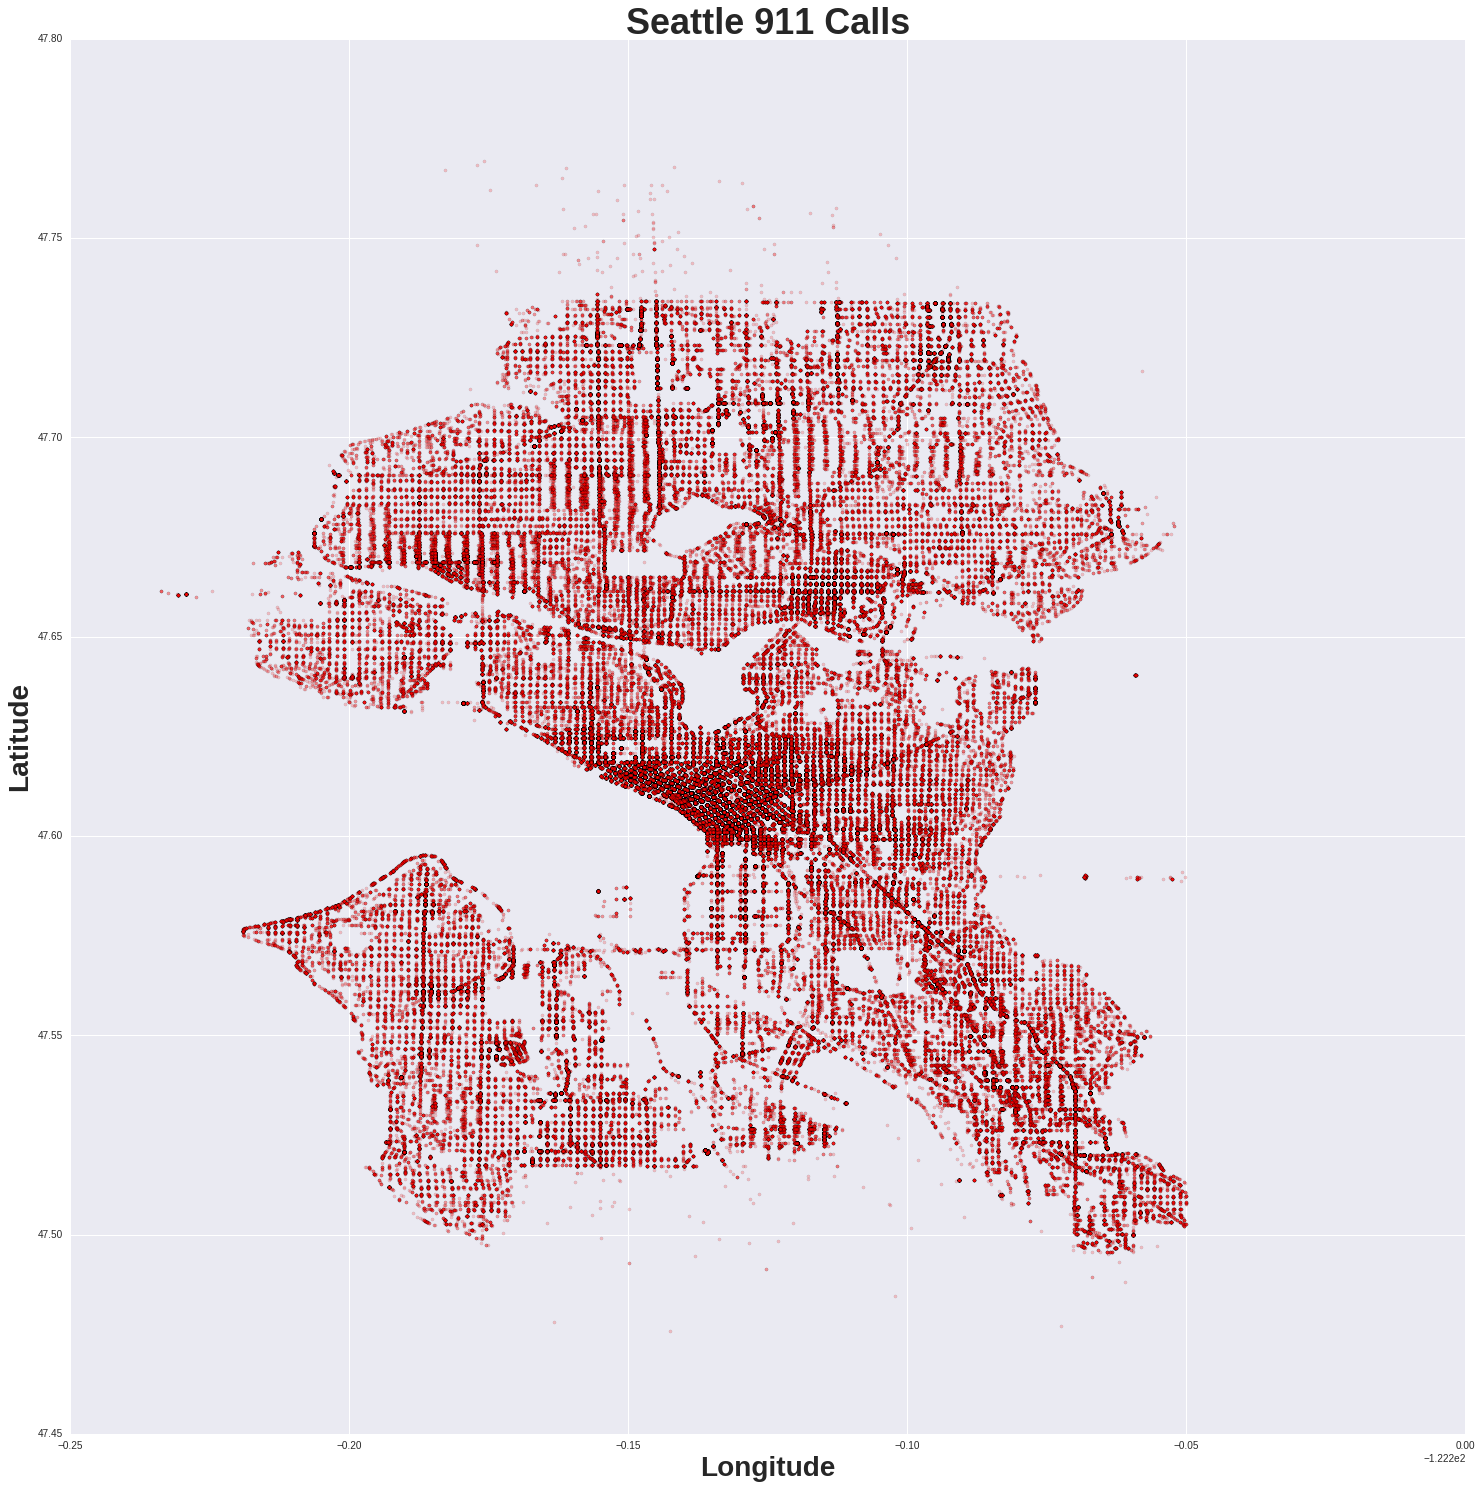

In [32]:
# Create and save a scatter plot (map) of 911 calls
df.plot(kind="scatter", x="Longitude", y="Latitude", color='r', s=10, alpha=0.2, figsize=(25,25))
plt.xlabel('Longitude', fontsize=28, fontweight='bold')
plt.ylabel('Latitude', fontsize=28, fontweight='bold')
plt.title('Seattle 911 Calls', fontsize=36, fontweight='bold')
plt.savefig('seattle_911a.png')

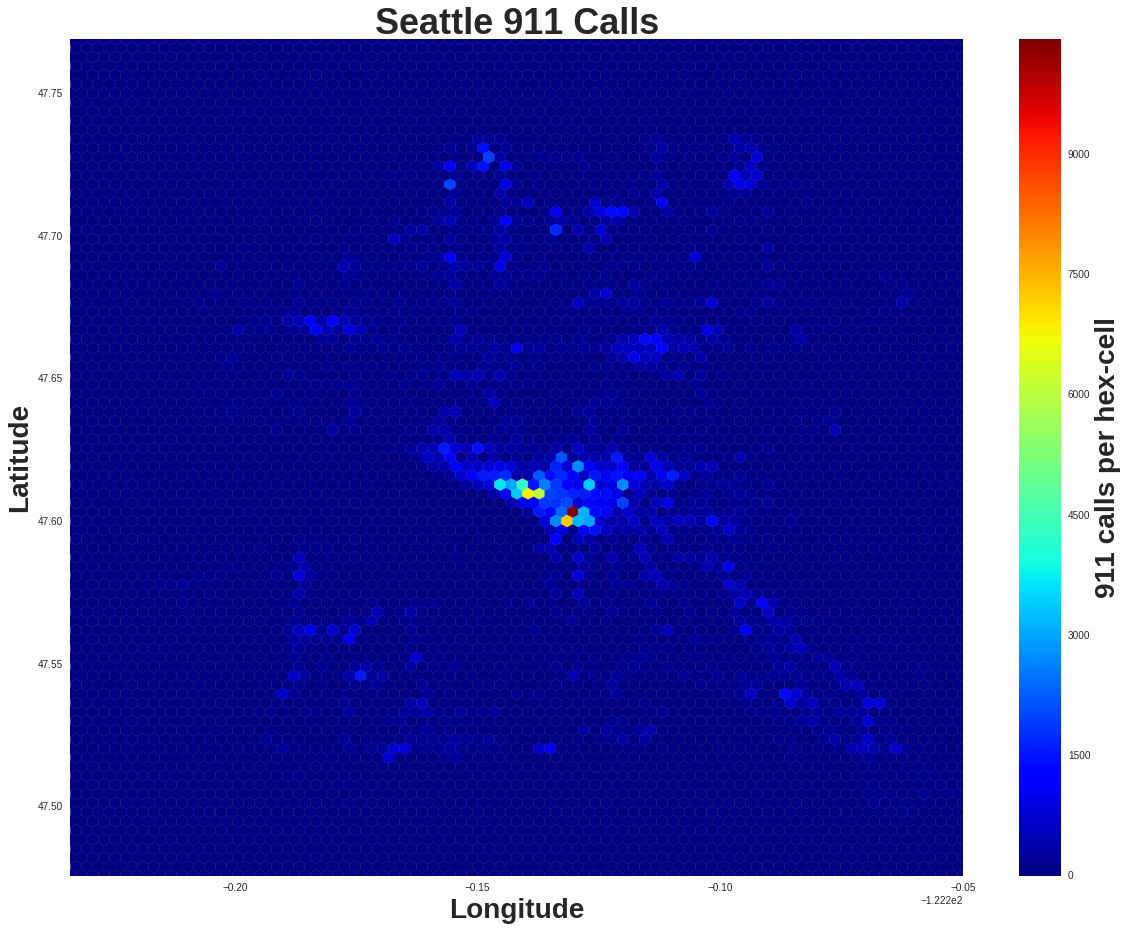

In [10]:
# Define axes for hexbin (3D histogram)
x = df.Longitude
y = df.Latitude

# If 'bins=None', hexagon colors correspond to counts
plt.figure(figsize=(20,15))
plt.hexbin(x, y, gridsize=80, cmap=plt.cm.jet, bins=None)
plt.axis([x.min(), x.max(), y.min(), y.max()])

# Label axes and create plot title
plt.xlabel('Longitude', fontsize=28, fontweight='bold')
plt.ylabel('Latitude', fontsize=28, fontweight='bold')
plt.title('Seattle 911 Calls', fontsize=36, fontweight='bold')

# Generate colormap scale and label, save plot
cb = plt.colorbar()
cb.set_label('911 calls per hex-cell', fontsize=28, fontweight='bold')
plt.savefig('seattle_911_hex.png')   

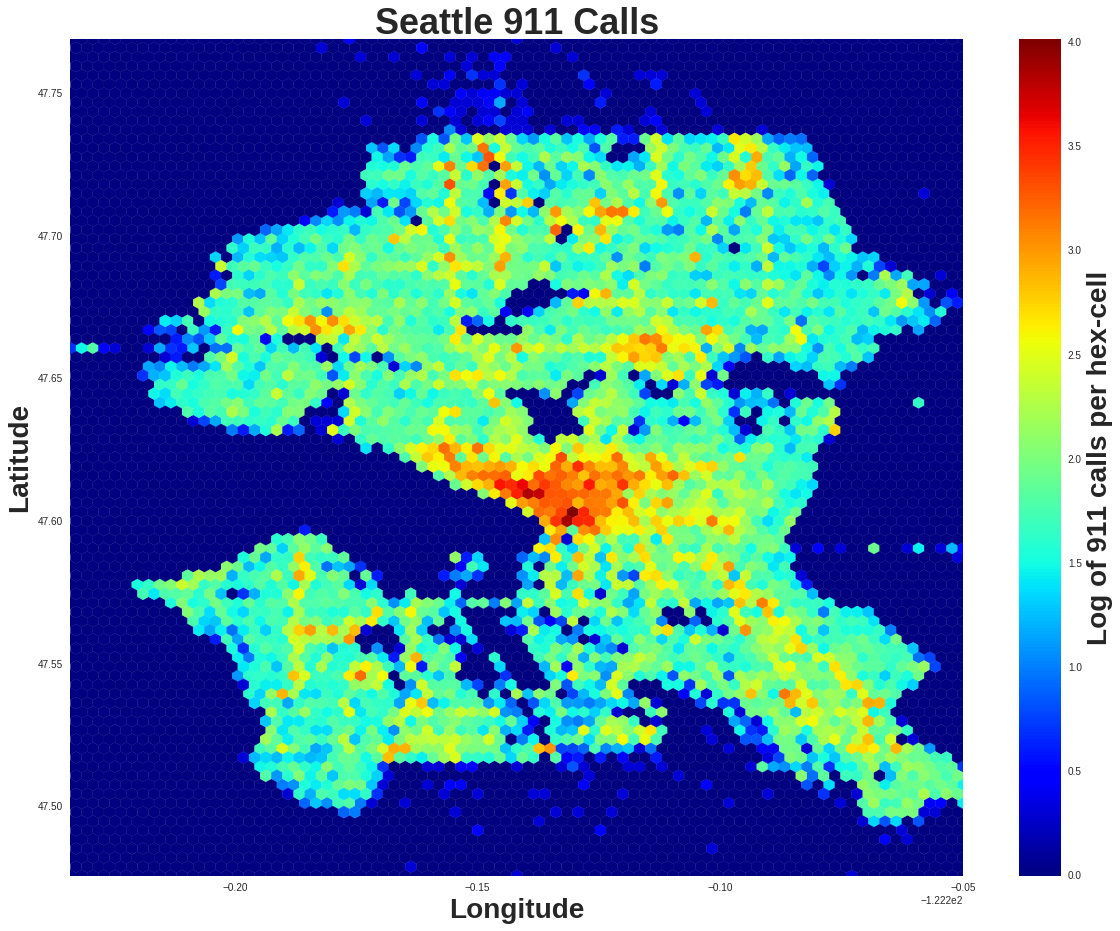

In [12]:
# Define axes for hexbin (3D histogram)
x = df.Longitude
y = df.Latitude

# Use log of counts for bins to reveal more structure  
plt.figure(figsize=(20,15))
plt.hexbin(x, y, gridsize=80, cmap=plt.cm.jet, bins='log')
plt.axis([x.min(), x.max(), y.min(), y.max()])

# Label axes and create plot title
plt.xlabel('Longitude', fontsize=28, fontweight='bold')
plt.ylabel('Latitude', fontsize=28, fontweight='bold')
plt.title('Seattle 911 Calls', fontsize=36, fontweight='bold')

# Generate colormap scale and label, save plot
cb = plt.colorbar()
cb.set_label('Log of 911 calls per hex-cell', fontsize=28, fontweight='bold')
plt.savefig('seattle_911_hexlog.png') 

In [14]:
# Investigate very 'hot' hex in downtown Seattle
df = df[((df['Latitude'] < 47.62) & (df['Latitude'] > 47.60))]
df = df[((df['Longitude'] < -122.33) & (df['Longitude'] > -122.34))]

In [16]:
# Majority of activity medical responses
df.groupby('Type').size()

Type
1RED 1 Unit                      297
3RED - 1 +1 + 1                   12
4RED - 2 + 1 + 1                 144
AFA4 - Auto Alarm 2 + 1 + 1      171
ANTIB - Antibiotic Delivery        1
Activated CO Detector             31
Aid Response                   41645
Aid Response Freeway              29
Aid Response Yellow              328
Aid Service                        6
Alarm Bell                       163
Assault w/Weap 7 per Rule        190
Assault w/Weapons 14               8
Assault w/Weapons, Aid             5
Assault w/Weapons- Aid            35
Auto Fire Alarm                 4075
Automatic Fire Alarm False       198
Automatic Fire Alarm Resd          2
Automatic Medical Alarm          190
Bark Fire                         39
Boat Taking Water Minr/Sho         1
Boat Under 50' Fire Shore          1
Boat Under 50' Fire Water          3
Boat Under 50' Unknown             1
Brush Fire                        18
Brush Fire Freeway                 4
Car Fire                         